In [2]:
# Explporatory Data Analysis for Titanic data 

# dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# using  "fivethirtyeight" styling, which tries to replicate the styles from FiveThirtyEight.com
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [3]:
# read csv

titanic_data = pd.read_csv('./Data/train.csv')

In [4]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# check nulls

titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

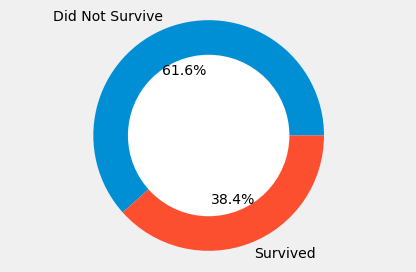

In [7]:
# How many survived 

# f,ax=plt.subplots(1,2,figsize=(18,8))
# titanic_data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
# ax[0].set_title('Survived')
# ax[0].set_ylabel('')
# sns.countplot('Survived',data=titanic_data,ax=ax[1])
# ax[1].set_title('Survived')
# plt.show()


# donut chart

labels = ['Did Not Survive', 'Survived']
survivors = titanic_data['Survived'].value_counts()
 
fig1, ax1 = plt.subplots()
ax1.pie(x = survivors, labels=labels, autopct='%1.1f%%')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()



Clearly not many passengers survived the sinking.

Roughly 342 out of 891 passengers survived (38.4%).

To get a better insight on the survival rate different features of the dataset were used. Including sex, port of embarcation, age, and more. 

Let me expolain the different types of features in this data.

In [9]:
## Analysing The Features

# Sex--> Categorical Feature

titanic_data.groupby(['Sex','Survived'])['Survived'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

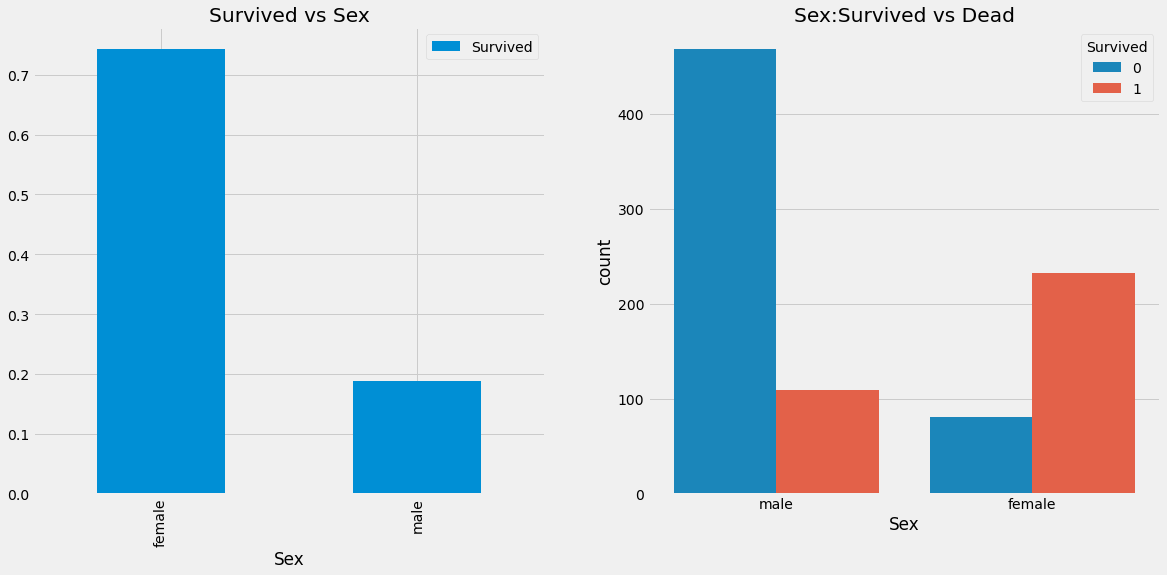

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
titanic_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=titanic_data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

The survival rates for a women on the ship is around 75% while that for men in around 18-19%.

This looks to be a very important feature for modeling. But is it the best?? Lets check other features.

In [17]:
# Pclass --> Ordinal Feature

pd.crosstab(titanic_data.Pclass,titanic_data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


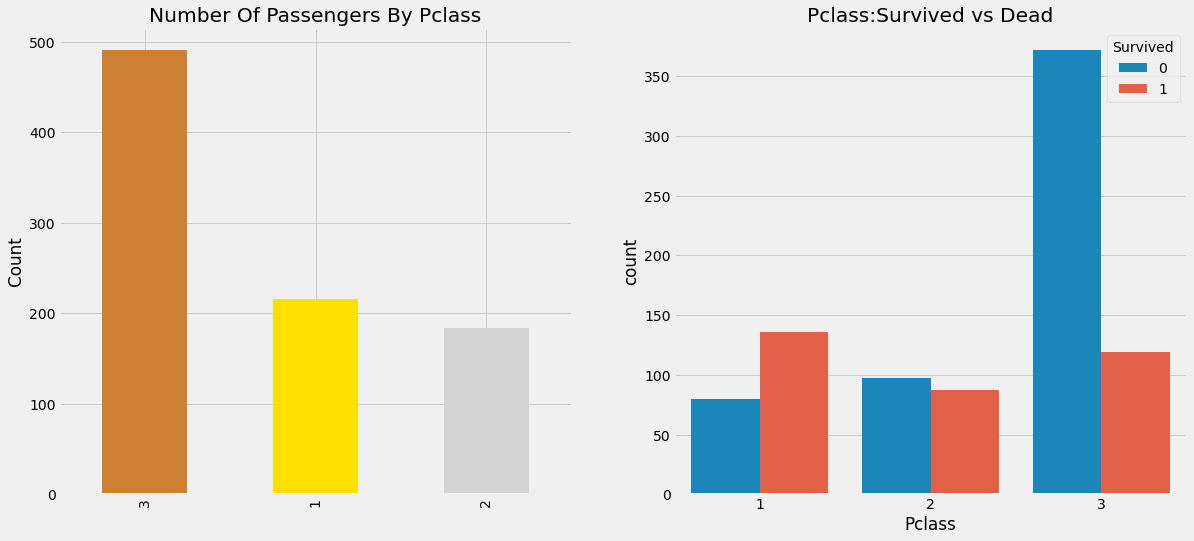

In [21]:
f,ax=plt.subplots(1,2,figsize=(18,8))
titanic_data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=titanic_data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1 %survived is around 63% while for Pclass2 is around 48%. So money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with Sex and Pclass Together.

In [23]:
pd.crosstab([titanic_data.Sex,titanic_data.Survived],titanic_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

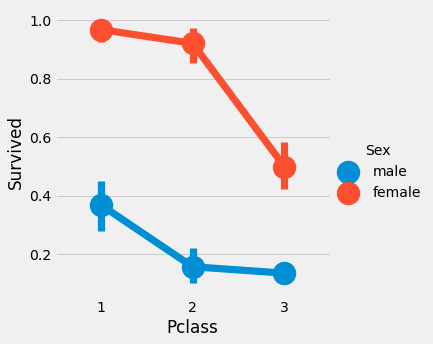

In [24]:
sns.factorplot('Pclass','Survived',hue='Sex',data=titanic_data)
plt.show()

We use FactorPlot in this case, because they make the seperation of categorical values easy.

Looking at the CrossTab and the FactorPlot, we can easily infer that survival for Women from Pclass1 is about 95-96%, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature. Lets analyse other features.